<a href="https://colab.research.google.com/github/yash-VNR/Workout-with-Iris-dataset-using-neural-networks/blob/master/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
%tensorflow_version 1.x     # I'm downgrading tensorflow to 1.x, in order to provide support to keras framework
from keras.utils.np_utils import to_categorical as tcg
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x     # I'm downgrading tensorflow to 1.x, in order to provide support to keras framework`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
data = pd.read_csv('Iris.csv')
data = data.drop(['Id'], axis = 1)

In [19]:
y = np.array(data['Species'])
print(np.unique(y))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [0]:
y = LabelEncoder().fit_transform(y)

In [0]:
data = data.drop(['Species'], axis = 1)

In [22]:
x = np.array(data)
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [0]:
model = Sequential()
model.add(Dense(6, input_dim = 4, activation = 'relu'))  # Hidden layer 1 of 6 neurons
model.add(Dense(4, activation = 'relu'))                  # Hidden Layer 2 of 4 neurons
model.add(Dense(3, activation = 'softmax'))               # Output layer of 3 neurons
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size = 0.1)
ytr = tcg(ytr)
yte_encoded = tcg(yte)   # I need to use "y testing data" for later use.
xtr.shape, ytr.shape  # CHecking training data shapes, inorder to rectify errors (if any) //

((135, 4), (135, 3))

In [25]:
model.fit(xtr, ytr, validation_data = (xte, yte_encoded), epochs = 300, batch_size = 10)

Train on 135 samples, validate on 15 samples
Epoch 1/300
135/135 [==============================] - 0s 2ms/step - loss: 1.8245 - acc: 0.3481 - val_loss: 2.2764 - val_acc: 0.2000
Epoch 2/300
135/135 [==============================] - 0s 145us/step - loss: 1.5952 - acc: 0.3481 - val_loss: 1.9751 - val_acc: 0.2000
Epoch 3/300
135/135 [==============================] - 0s 161us/step - loss: 1.4226 - acc: 0.3481 - val_loss: 1.7466 - val_acc: 0.2000
Epoch 4/300
135/135 [==============================] - 0s 175us/step - loss: 1.2875 - acc: 0.3481 - val_loss: 1.5661 - val_acc: 0.2000
Epoch 5/300
135/135 [==============================] - 0s 147us/step - loss: 1.1796 - acc: 0.3704 - val_loss: 1.4124 - val_acc: 0.2667
Epoch 6/300
135/135 [==============================] - 0s 140us/step - loss: 1.0900 - acc: 0.5333 - val_loss: 1.2856 - val_acc: 0.4000
Epoch 7/300
135/135 [==============================] - 0s 140us/step - loss: 1.0179 - acc: 0.6074 - val_loss: 1.1818 - val_acc: 0.4000
Epoch 8/300


In [0]:
test_pred = []
for sample in model.predict(xte):
  test_pred.append(np.argmax(sample))

In [27]:
print('Validation Accuracy:', accuracy_score(yte, test_pred) * 100, '%')

Validation Accuracy: 100.0 %


In [0]:
y_pred = []
for sample in model.predict(x):
  y_pred.append(np.argmax(sample))

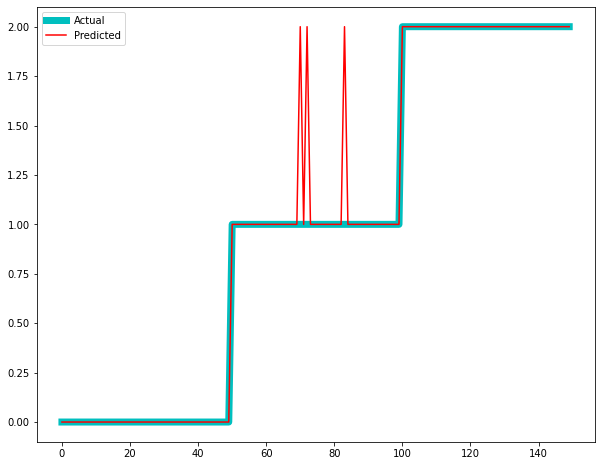

In [29]:
#Plot for comparing actual and predicted values, 
plt.figure(figsize = (10, 8))
plt.plot(np.arange(len(x)), y, color = 'c', label = 'Actual', linewidth = 7.0)
# Actual plot based on the given data
# x->index of dataset, y-> class of data
plt.plot(np.arange(len(x)), y_pred, color = 'r', label = 'Predicted') 
# Predicted plot based on the given training data
plt.legend()
plt.show()

In [30]:
print('Accuracy of training:', accuracy_score(y, y_pred) * 100, '%')

Accuracy of training: 98.0 %
